<a href="https://colab.research.google.com/github/handsome1201/Girl_or_Boy/blob/main/%EB%82%A8%EC%9E%90%EC%9D%BC%EA%B9%8C%EC%9A%94_%EC%97%AC%EC%9E%90%EC%9D%BC%EA%B9%8C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.python.client import device_lib
from sklearn.utils import shuffle

load data

In [4]:
train_file_0= os.listdir("/content/drive/MyDrive/공소실 자료/archive/train_data/train_data/남성664")
test_file_0= os.listdir("/content/drive/MyDrive/공소실 자료/archive/test_data/test_data_man100")
train_file_1= os.listdir("/content/drive/MyDrive/공소실 자료/archive/train_data/train_data/여성718")
test_file_1= os.listdir("/content/drive/MyDrive/공소실 자료/archive/test_data/test_data_woman100")

set train data

In [3]:
X_train= 0
check= False

for file in train_file_0:
    img_data= image.load_img("/content/drive/MyDrive/공소실 자료/archive/train_data/train_data/남성664/"+file)
    img_arr= (image.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)

    if(check== False):
        X_train= img
        check= True
    else:
        X_train= np.vstack((X_train, img))

for file in train_file_1:
    img_data= image.load_img("/content/drive/MyDrive/공소실 자료/archive/train_data/train_data/여성718/"+file)
    img_arr= (image.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    X_train= np.vstack((X_train, img))

In [4]:
y_train= np.array([0]* len(train_file_0))
y_train_1= np.array([1]* len(train_file_1))
y_train= np.append(y_train, y_train_1)

In [5]:
print(X_train.shape)
print(y_train.shape)

(1382, 480, 480, 3)
(1382,)


set test data

In [6]:
X_test= 0
check= False

for file in test_file_0:
    img_data= image.load_img("/content/drive/MyDrive/공소실 자료/archive/test_data/test_data_man100/"+ file)
    img_arr= (image.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    
    if(check== False):
        X_test= img
        check= True
    else:
        X_test= np.vstack((X_test, img))
        
for file in test_file_1:
    img_data= image.load_img("/content/drive/MyDrive/공소실 자료/archive/test_data/test_data_woman100/"+ file)
    img_arr= (image.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    X_test= np.vstack((X_test, img))

In [7]:
y_test= np.array([0]* len(test_file_0))
y_test_1= np.array([1]* len(test_file_1))
y_test= np.append(y_test, y_test_1)

In [8]:
print(X_test.shape)
print(y_test.shape)

(200, 480, 480, 3)
(200,)


In [9]:
X_train, y_train= shuffle(X_train, y_train, random_state= 42)
X_test, y_test= shuffle(X_test, y_test, random_state= 42)

save data

In [10]:
np.save("/content/drive/MyDrive/공소실 자료/dataset/X_train", X_train)
np.save("/content/drive/MyDrive/공소실 자료/dataset/y_train", y_train)
np.save("/content/drive/MyDrive/공소실 자료/dataset/X_test", X_test)
np.save("/content/drive/MyDrive/공소실 자료/dataset/y_test", y_test)

load data

In [5]:
X_train= np.load("/content/drive/MyDrive/공소실 자료/dataset/X_train.npy")
y_train= np.load("/content/drive/MyDrive/공소실 자료/dataset/y_train.npy")
X_test= np.load("/content/drive/MyDrive/공소실 자료/dataset/X_test.npy")
y_test= np.load("/content/drive/MyDrive/공소실 자료/dataset/y_test.npy")

build model

In [6]:
model= keras.models.Sequential()

In [7]:
model.add(keras.layers.Conv2D(64, 10, activation= "relu", padding= "same", input_shape= [480, 480, 3]))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(128, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Conv2D(128, 4, activation= "relu", padding= "same"))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(256, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Conv2D(256, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation= "softmax"))

In [8]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer= "sgd", metrics= ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 480, 480, 64)      19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 240, 240, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 128)     131200    
                                                                 
 conv2d_2 (Conv2D)           (None, 240, 240, 128)     262272    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 120, 120, 128)    0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 120, 256)     5

train

In [9]:
history= model.fit(X_train, y_train, epochs= 2)

Epoch 1/2
44/44 [==============================] - 102s 2s/step - loss: 0.6955 - accuracy: 0.5036
Epoch 2/2
44/44 [==============================] - 79s 2s/step - loss: 0.6877 - accuracy: 0.5535


check loss and accuracy

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

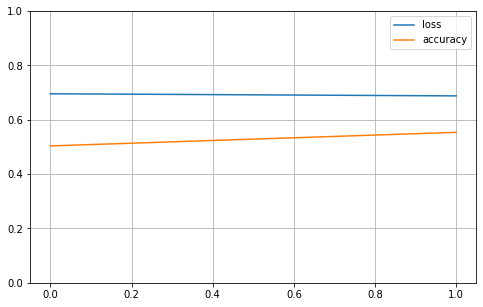

In [11]:
pd.DataFrame(history.history).plot(figsize= (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

use test data

In [12]:
y_predicted= model.predict(X_test)
y_pred = y_predicted.argmax(axis=-1)

In [13]:
y_test

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1])

check accuracy

In [14]:
accuracy= 0

for i in range(len(y_test)):
    if(y_test[i]== y_pred[i]):
        accuracy+= 1
        
print(accuracy/len(y_test))

0.66
